# Project 3: Healthy Rides 

**Import modules**

In [1]:
import pandas as pd
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


**Import the Data**

This project centers around looking at the varying types of trips taken by users through the biking company Healthy Rides over the course of three years (2015-2017). Trips are defined as any valid rental one minute or longer that starts and ends at a Healthy Ride station. For the purposes of this project, we will also break up the time period into quarters where quarter 1 consists of January, February, & March; quarter 2 consists of April, May, & June; quarter 3 consists of July, August, & September; and quarter 4 consists of October, November, & December. The dataset we utilize for this project comes from https://catalog.data.gov/dataset/healthy-ride-trip-data and includes the Bike ID of the bike used, membership type of the user, when the trip started and ended, and where the trip started and ended. Below, we have loaded the tables containing data on the Healthy Ride rentals for the years 2015-2017 by quarter. 

In [2]:
Rides2017_q1=Table.read_table("healthy-ride-rentals-2017-q1.csv") 
Rides2017_q2=Table.read_table("healthy-ride-rentals-2017-q2.csv") 
Rides2017_q3=Table.read_table("healthy-ride-rentals-2017-q3.csv") 
Rides2016_q1=Table.read_table("healthyride-rentals-2016-q1.csv") 
Rides2016_q2=Table.read_table("healthyride-rentals-2016-q2.csv") 
Rides2016_q3=Table.read_table("healthyride-rentals-2016-q3.csv") 
Rides2016_q4=Table.read_table("healthyride-rentals-2016-q4.csv") 
Rides2015_q2=Table.read_table("healthyride-rentals-2015-q2.csv") 
Rides2015_q3=Table.read_table("healthyride-rentals-2015-q3.csv") 
Rides2015_q4=Table.read_table("healthyride-rentals-2015-q4.csv") 
Stations_2017=Table.read_table("healthyridestations2017.csv") 

**Combine All the Tables into one Large Table**

In order to work with all the data, we have combined all of the tables for each quarter and year into one large table called `total_tables` using the function `append`. 

In [3]:
total_tables=Rides2017_q1.copy()
total_tables=total_tables.append(Rides2017_q2).append(Rides2017_q3).append(Rides2016_q1).append(Rides2016_q2).append(Rides2016_q3).append(Rides2016_q4).append(Rides2015_q2).append(Rides2015_q3).append(Rides2015_q4)


Additionally, in order to have even more ways to work with the data, we used the `join` function to add the latitude and longitude of each station to 'total_tables', pulling this from a table we defined above called `Stations_2017` and called this new table `Total_with_all_stuff_final`. 

In [4]:
Total_with_start_stuff=total_tables.join("From station id", Stations_2017, "Station #").relabel("Latitude", "Start Latitude").relabel("Longitude", "Start Longitude")
Total_with_all_stuff=Total_with_start_stuff.join("To station id", Stations_2017, "Station #").relabel("Latitude", "End Latitude").relabel("Longitude", "End Longitude")
Total_with_all_stuff_final=Total_with_all_stuff.drop("# of Racks_2","Station Name","Station Name_2")
Total_with_all_stuff_final

To station id,From station id,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,# of Racks,Start Latitude,Start Longitude,End Latitude,End Longitude
1000,1000,25767868,1/11/2017 14:01,1/11/2017 14:25,70013,1482,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25767880,1/11/2017 14:03,1/11/2017 14:26,70479,1384,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25779222,1/13/2017 12:11,1/13/2017 12:17,70155,355,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25812448,1/19/2017 15:13,1/19/2017 16:23,70446,4223,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25817308,1/20/2017 10:21,1/20/2017 10:22,70093,81,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25823113,1/21/2017 12:25,1/21/2017 13:41,70036,4548,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25823127,1/21/2017 12:27,1/21/2017 13:17,70195,3027,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25823856,1/21/2017 15:03,1/21/2017 15:49,70442,2800,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25823865,1/21/2017 15:05,1/21/2017 15:50,70414,2663,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047
1000,1000,25823907,1/21/2017 15:13,1/21/2017 15:48,70028,2106,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047


Since we are interested in the varying types of trips each type of user takes and whether these trips vary with the time or day of year, we first wanted to look at the most common trips all users take in general at any time of year.

## 1. What is the most common start and end destination combination?

To start, we can look at the map below to visualize the location of all the stations and see all the different start and stop combinations available to the users.

In [5]:
Marker.map_table(Stations_2017.select(3, 4, 1))

Then, we can create a new table called `start_stop_combinations` using the function `pivot` which will create a table with the counts for each of the combinations of start and stop stations.

In [6]:
start_stop_combinations = total_tables.pivot(6,8)
start_stop_combinations

To station name,10th St & Penn Ave (David L. Lawrence Convention Center),12th St & Penn Ave,17th St & Penn Ave,21st St & Penn Ave,33rd St and Penn Ave,42nd & Penn Ave.,42nd St & Butler St,ASCEND Pittsburgh,Alder St & S Highland Ave,Atwood St & Bates St,Boulevard of the Allies & Parkview Ave,Butler St & Stanton Ave,Centre Ave & Kirkpatrick St,Centre Ave & PPG Paints Arena,EQT Plaza,Ellsworth Ave & N Neville St,Federal St & E North Ave,Fifth Ave & S Bouquet St,Fifth Ave & S Dithridge St,First Ave & B St (T Station),First Ave & Smithfield St (Art Institute),Forbes Ave & Grant St,Forbes Ave & Market Square,Forbes and Gist (Open Streets May 2017),Fort Duquesne Blvd & 7th St,Frew St & Schenley Dr,Healthy Ride Hub,Highmark Stadium,Isabella St & Federal St (PNC Park),Ivy St & Walnut St,Liberty Ave & Baum Blvd,Liberty Ave & S Millvale Ave (West Penn Hospital),Liberty Ave & Stanwix St,Maryland Ave & Ellsworth Ave,North Shore Trail & Fort Duquesne Bridge,O'Hara St and University Place (Soldiers and Sailors Memorial),Penn Ave & N Fairmount St,Penn Ave & Putnam St (Bakery Square),Penn Ave & S Whitfield St,Ridge Ave & Brighton Rd (CCAC),Ross St & Sixth Ave (Steel Plaza T Station),S 12th St & E Carson St,S 18th St & Sidney St,S 22nd St & E Carson St,S 25th St & E Carson St,S 27th St & Sidney St. (Southside Works),S Euclid Ave & Centre Ave,S Main St & Alexander St,S Millvale Ave & Centre Ave,S Negley Ave & Baum Blvd,Schenley Dr at Schenley Plaza (Carnegie Library Main),Schenley Park Pool,Shady Ave & Ellsworth Ave,Stevenson St & Forbes Ave,Taylor St & Liberty Ave,Third Ave & Wood St,Walnut St & College St,Western Ave & Bidwell Street,Zulema St & Coltart Ave
10th St & Penn Ave (David L. Lawrence Convention Center),2336,161,835,1040,47,82,251,0,7,8,49,333,12,69,1,10,246,26,7,55,96,79,387,0,171,9,66,0,342,58,43,92,407,12,258,12,37,12,8,98,83,102,75,56,53,112,7,0,17,27,20,0,6,51,161,56,100,0,21
12th St & Penn Ave,134,978,100,163,19,40,73,0,5,3,4,45,9,24,0,8,50,7,4,20,38,38,287,0,43,0,26,0,145,1,7,47,134,3,80,2,13,2,6,4,40,17,16,10,10,14,1,0,3,2,3,0,1,13,25,24,4,0,3
17th St & Penn Ave,721,176,683,191,17,65,167,0,4,18,4,99,1,88,0,12,141,10,9,77,219,101,506,0,162,27,19,0,219,21,27,51,561,61,144,11,20,3,5,57,131,88,81,57,60,72,10,0,5,28,9,0,3,46,43,72,5,1,12
21st St & Penn Ave,1304,335,139,1900,65,107,479,0,30,13,3,375,4,67,0,40,122,26,23,62,113,131,761,0,395,9,97,0,456,91,77,64,631,35,266,28,43,6,25,103,253,88,49,24,52,146,20,0,4,20,21,0,23,57,127,85,28,0,11
33rd St and Penn Ave,45,9,12,50,250,14,25,0,1,0,0,23,0,3,0,3,12,1,1,4,6,7,25,0,18,1,68,0,21,0,5,5,23,4,20,2,16,1,9,2,6,3,1,1,4,6,0,0,0,2,1,0,0,0,12,2,1,0,0
42nd & Penn Ave.,34,22,10,32,2,215,23,0,26,11,1,24,2,1,0,21,2,32,66,2,4,6,14,0,14,14,10,0,15,83,177,56,19,49,9,30,92,80,107,5,2,3,2,1,0,1,15,0,4,89,22,0,34,2,30,18,40,0,2
42nd St & Butler St,445,133,163,454,24,205,1150,0,25,5,3,142,27,36,0,25,39,22,33,21,45,238,225,0,174,49,73,0,301,75,130,176,191,33,165,23,210,18,91,28,56,34,27,27,13,28,21,0,2,54,29,0,10,18,160,81,25,0,7
ASCEND Pittsburgh,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alder St & S Highland Ave,0,2,4,8,1,29,8,0,431,13,7,7,0,1,0,151,0,194,68,1,2,3,5,0,5,26,0,0,1,350,63,31,2,78,8,117,41,478,32,3,0,4,7,2,0,18,15,0,8,68,56,0,91,0,26,0,111,0,2
Atwood St & Bates St,2,5,8,4,0,13,2,0,10,565,101,1,1,0,0,43,4,455,84,36,2,4,25,0,3,74,11,3,4,78,15,15,26,21,10,160,3,6,9,0,4,3,12,9,13,51,5,0,27,24,148,0,6,72,11,1,6,0,22


To pull the most common combination of start and stop station destinations, we can create a new table called `most_common_combinations` using the function `group` which will have a column with the start station name and end station name as well as the count of this combination in a table that we can sort from greatest to least.

In [7]:
most_common_combinations = Total_with_all_stuff_final.group(["From station name", "To station name"]).sort("count", descending=True)
most_common_combinations

From station name,To station name,count
S 27th St & Sidney St. (Southside Works),S 27th St & Sidney St. (Southside Works),6033
North Shore Trail & Fort Duquesne Bridge,North Shore Trail & Fort Duquesne Bridge,4492
Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,4177
Forbes Ave & Market Square,Forbes Ave & Market Square,2931
Isabella St & Federal St (PNC Park),Isabella St & Federal St (PNC Park),2702
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),2336
21st St & Penn Ave,21st St & Penn Ave,1900
S 12th St & E Carson St,S 12th St & E Carson St,1822
S 18th St & Sidney St,S 18th St & Sidney St,1797
Schenley Dr at Schenley Plaza (Carnegie Library Main),Schenley Dr at Schenley Plaza (Carnegie Library Main),1732


**Answer**: 

In [8]:
print('The most common start and end station combination is', '\033[1m' + most_common_combinations.column('From station name')[0], 'to', most_common_combinations.column('To station name')[0])

The most common start and end station combination is S 27th St & Sidney St. (Southside Works) to S 27th St & Sidney St. (Southside Works)


Now that we know the most common start and end station combination, we can move on to seeing whether types of trips vary with user type. 

## 2. Do types of trips vary with user type?

**Recall**: There are 3 different user types: Customer, Daily, and Subscriber. The user types are based on the type of membership the user holds with Healthy Rides in terms of whether they are just renting for the day or have a monthly or yearly membership. 

In terms of types of trips, we will be comparing the amount of users per user type, the duration of the trips based on user type, and the start/end destinations for each user types. 

To begin, we will look at how many of each user type Healthy Rides has (in terms of the dataset we have access to). We do this by using the `group` method by 'Usertype' which will count the amount of users there are by type in a table called `user_types_total`.

In [29]:
user_types_total = Total_with_all_stuff_final.group('Usertype')
user_types_total

Usertype,count
Customer,122241
Daily,186
Subscriber,75332


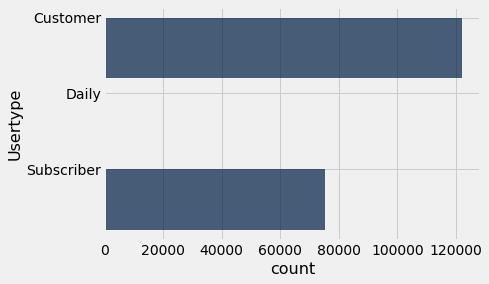

In [30]:
user_types_total.barh('Usertype')

In [32]:
difference_cust_daily = user_types_total.column('count')[0] - user_types_total.column('count')[1]
print('Customer user types outweigh Daily user types by', '\033[1m', difference_cust_daily, 'users')

Customer user types outweigh Daily user types by  122055 users


From this bar chart, we can see that Customer user types are the most common followed by Subscriber and Daily with huge differences the number of each type. As seen in the above calculation, Customer users outnumber Daily users by 122,055 users. Daily users numbers are so low that it isn't even visible on the graph.

Next, to further look at the difference user types may have in terms of types of trips, we will start by looking at whether there is a correlation between trip duration and user types. To do so, we can create a bar graph in order to visualize the data.

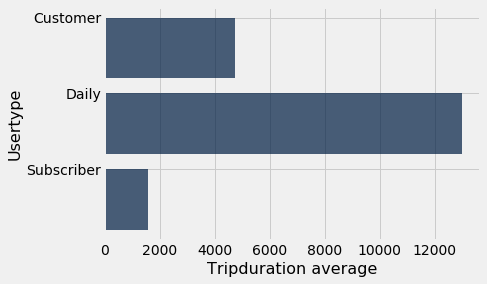

In [12]:
Total_with_all_stuff_final.select(["Tripduration","Usertype"]).group("Usertype", np.average).barh("Usertype")

In [13]:
duration = Total_with_all_stuff_final.select(["Tripduration","Usertype"]).group("Usertype", np.average)
duration_diff = int(round(duration.column('Tripduration average')[1] - duration.column('Tripduration average')[0]))
print('Daily user types trip duration average outweigh Customer user types trip duration average by', '\033[1m', duration_diff, 'seconds')


Daily user types trip duration average outweigh Customer user types trip duration average by  8261 seconds


Looking at our bar graph above, we can see that daily users have a much higher trip duration than customer or subscriber users by at least 8261 seconds despite being the lowest in number of users. Daily users rent the Healthy Trip bikes for the entire day while customer and subscriber users have monthly memberships.This may explain why Daily users ride for much longer: they may want to get the most of their purchase since they are renting for the day rather than by month. 

Lastly, we want to look at whether there is a correlation between user type and start/end destinations to view another effect user types may have on trip types. We can do this by grouping the start and stations and count the number of users of each type at this combination.

**Is there a correlation between user type and start/end destinations?**

To begin, we will create a table called `user_type_start_stop` that groups the start and end station combinations and counts the amount of users by type at that combination. 

In [41]:
user_type_start_stop = Total_with_all_stuff_final.group(["From station name", "To station name", "Usertype"])
user_type_start_stop

From station name,To station name,Usertype,count
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),Customer,2073
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),Daily,4
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),Subscriber,259
10th St & Penn Ave (David L. Lawrence Convention Center),12th St & Penn Ave,Customer,89
10th St & Penn Ave (David L. Lawrence Convention Center),12th St & Penn Ave,Daily,1
10th St & Penn Ave (David L. Lawrence Convention Center),12th St & Penn Ave,Subscriber,44
10th St & Penn Ave (David L. Lawrence Convention Center),17th St & Penn Ave,Customer,334
10th St & Penn Ave (David L. Lawrence Convention Center),17th St & Penn Ave,Subscriber,387
10th St & Penn Ave (David L. Lawrence Convention Center),21st St & Penn Ave,Customer,746
10th St & Penn Ave (David L. Lawrence Convention Center),21st St & Penn Ave,Daily,2


Next, we want create separate tables for each of the three different user types in order to compare them. We will call these `customer_type`, `daily_type`, and `subscriber_type`.

In [15]:
customer_type = user_type_start_stop.where('Usertype', are.equal_to('Customer')).sort('count', descending = True)
customer_type

From station name,To station name,Usertype,count
S 27th St & Sidney St. (Southside Works),S 27th St & Sidney St. (Southside Works),Customer,5471
North Shore Trail & Fort Duquesne Bridge,North Shore Trail & Fort Duquesne Bridge,Customer,4294
Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,3681
Forbes Ave & Market Square,Forbes Ave & Market Square,Customer,2560
Isabella St & Federal St (PNC Park),Isabella St & Federal St (PNC Park),Customer,2477
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),Customer,2073
21st St & Penn Ave,21st St & Penn Ave,Customer,1722
S 18th St & Sidney St,S 18th St & Sidney St,Customer,1614
S 12th St & E Carson St,S 12th St & E Carson St,Customer,1595
Schenley Dr at Schenley Plaza (Carnegie Library Main),Schenley Dr at Schenley Plaza (Carnegie Library Main),Customer,1571


In [16]:
daily_type = user_type_start_stop.where('Usertype', are.equal_to('Daily')).sort('count', descending = True)
daily_type

From station name,To station name,Usertype,count
Forbes Ave & Market Square,Forbes Ave & Market Square,Daily,6
Centre Ave & PPG Paints Arena,17th St & Penn Ave,Daily,5
Isabella St & Federal St (PNC Park),Isabella St & Federal St (PNC Park),Daily,5
S 12th St & E Carson St,S 12th St & E Carson St,Daily,5
10th St & Penn Ave (David L. Lawrence Convention Center),10th St & Penn Ave (David L. Lawrence Convention Center),Daily,4
21st St & Penn Ave,21st St & Penn Ave,Daily,4
Federal St & E North Ave,Federal St & E North Ave,Daily,4
Fort Duquesne Blvd & 7th St,Fort Duquesne Blvd & 7th St,Daily,4
Liberty Ave & Baum Blvd,Liberty Ave & Baum Blvd,Daily,4
Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Daily,4


In [17]:
subscriber_type = user_type_start_stop.where('Usertype', are.equal_to('Subscriber')).sort('count', descending = True)
subscriber_type

From station name,To station name,Usertype,count
Boulevard of the Allies & Parkview Ave,Fifth Ave & S Bouquet St,Subscriber,1001
Fifth Ave & S Bouquet St,Boulevard of the Allies & Parkview Ave,Subscriber,908
Boulevard of the Allies & Parkview Ave,Frew St & Schenley Dr,Subscriber,790
Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,721
Alder St & S Highland Ave,Penn Ave & Putnam St (Bakery Square),Subscriber,658
S 27th St & Sidney St. (Southside Works),S 27th St & Sidney St. (Southside Works),Subscriber,559
10th St & Penn Ave (David L. Lawrence Convention Center),21st St & Penn Ave,Subscriber,556
17th St & Penn Ave,10th St & Penn Ave (David L. Lawrence Convention Center),Subscriber,508
21st St & Penn Ave,10th St & Penn Ave (David L. Lawrence Convention Center),Subscriber,497
Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Subscriber,492


To begin analyzing whether there may be a connection between user types and start/end station combinations, we can pull the most common start/end station combination for each type. 

In [18]:
print('The most common start and end station combination for Customer users is:', '\033[1m', customer_type.column('From station name')[0], 'to', customer_type.column('To station name')[0], '\033[0m')


print('The most common start and end station combination for Daily users is:', '\033[1m', daily_type.column('From station name')[0], 'to', daily_type.column('To station name')[0], '\033[0m')


print('The most common start and end station combination for Subscriber users is:', '\033[1m', subscriber_type.column('From station name')[0], 'to', subscriber_type.column('To station name')[0], '\033[0m')


The most common start and end station combination for Customer users is:  S 27th St & Sidney St. (Southside Works) to S 27th St & Sidney St. (Southside Works) 
The most common start and end station combination for Daily users is:  Forbes Ave & Market Square to Forbes Ave & Market Square 
The most common start and end station combination for Subscriber users is:  Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St 


From this, we can see that the most common start and end station combinations for each user type are all different. But how different are they?

To further compare, let's see what percentage of Subscriber users go to Daily users' most common start and end station combination, **Forbes Ave & Market Square to Forbes Ave & Market Square**, compared to their own most common start and end station combination, **Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St**.

In [19]:
sub_count = int(round((subscriber_type.where('From station name', are.equal_to('Boulevard of the Allies & Parkview Ave')).where('To station name', are.equal_to('Fifth Ave & S Bouquet St')).column('count')[0])/(subscriber_type.num_rows)*100))
sub_count_user = int(round((subscriber_type.where('From station name', are.equal_to('Forbes Ave & Market Square')).where('To station name', are.equal_to('Forbes Ave & Market Square')).column('count')[0])/(subscriber_type.num_rows)*100))


print('\033[1m', sub_count_user, "% \033[0m of Subscriber users bike from \033[1m Forbes Ave & Market Square to Forbes Ave & Market Square \033[0m compared to \033[1m", sub_count, "% \033[0m of Subscribers users who bike from \033[1m Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St. \033[0m")


 17 %  of Subscriber users bike from  Forbes Ave & Market Square to Forbes Ave & Market Square  compared to  47 %  of Subscribers users who bike from  Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St. 


To make this comparison easier, we can define a function called `percentage_user_types` that will take in the user tables, start/end station combinations, indices, and user types as their arguments and return a statement that compares the percentages of the users who bike from/to the given stations allowing us to compare as many routes between user types as we would like.

In [20]:
def percentage_user_types(user_table_1, user_table_2, from_street_1, to_street_1, i_1, from_street_2, to_street_2, i_2, user_type_1, user_type_2):
    user_percentage = int(round((user_table_1.where('From station name', are.equal_to(from_street_1)).where('To station name', are.equal_to(to_street_1)).column('count')[i_1])/(user_table_1.num_rows)*100))
    user_percentage_two = int(round((user_table_2.where('From station name', are.equal_to(from_street_2)).where('To station name', are.equal_to(to_street_2)).column('count')[i_2])/(user_table_2.num_rows)*100))
    print('\033[1m', user_percentage, "% \033[0m of", user_type_1, "users bike from \033[1m", from_street_1, "to", to_street_1, "\033[0m compared to \033[1m", user_percentage_two, "% \033[0m of", user_type_2, "users who bike from \033[1m", from_street_2, "to", to_street_2,'.')


Let's see if we're right. We can test this by checking again what percent of Subscriber users bike from Forbes Ave & Market Square to Forbes Ave compared to the percent of Subscriber users who bike from Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St. The statement printed should be the same as the one above.

In [21]:
test_func = percentage_user_types(subscriber_type, subscriber_type, 'Forbes Ave & Market Square', 'Forbes Ave & Market Square', 0, 'Boulevard of the Allies & Parkview Ave', 'Fifth Ave & S Bouquet St', 0, 'Subscriber', 'Subscriber')
test_func

 17 %  of Subscriber users bike from  Forbes Ave & Market Square to Forbes Ave & Market Square  compared to  47 %  of Subscriber users who bike from  Boulevard of the Allies & Parkview Ave to Fifth Ave & S Bouquet St .


It matches! Now, we have a function that can be used to compare as many user types and start/end station destinations as we'd like. 

Let's try it to check the percentage of Daily users who bike from **Centre Ave & PPG Paints Arena to 17th St & Penn Ave** compared to the percentage of Customer users who bike there. 

In [22]:
perc_daily_cust = percentage_user_types(daily_type, customer_type, 'Centre Ave & PPG Paints Arena', '17th St & Penn Ave', 0, 'Centre Ave & PPG Paints Arena', '17th St & Penn Ave', 0, 'Daily', 'Customer')
perc_daily_cust


 4 %  of Daily users bike from  Centre Ave & PPG Paints Arena to 17th St & Penn Ave  compared to  2 %  of Customer users who bike from  Centre Ave & PPG Paints Arena to 17th St & Penn Ave .


**SUMMARY**: 
For question 2, we wanted to see if types of trips vary with user type. To do so, we did the following:
    1. Looked at the amount of users by user type in a table and bar graph.
    2. Observed whether there is a correlation between trip duration and user types by creating a bar graph. 
    3. Checked whether there is a correlation between user type and start/end destination.

**ANSWER**:
For each of the following, we saw that the data did vary greatly according to user type. 
In terms of amount of users, there was a large difference in subscriber, customer, and daily users, with customer users being much more active than daily users by 122,055 users! 
When looking at trip duration average and user types, we observed on the bar graph that daily users have a much higher trip duration average than both customer and subscriber users by at least 8261 seconds. 
Lastly, looking at start/end destinations and user types, we see that none of the user types have the same most common start/end destination combination. When comparing the percentage of users that bike to the different start/end combinations, we see that the numbers are low for those that do bike to another user's most common start/end combinations. For example, we saw that subscriber users biking to daily users' most common start/end station is only 17% compared to the 47% of subscribers who bike to their own most common start/end station. From these 3 checks, we can observe that the types of trips in terms of duration and location may be influenced by the user type, or at least observe the differences in all of these factors by user type. 

## 3. Do the types of trips vary with the time of day or year?

To start, we can sort the data by quarters to see if the number of users renting bikes vary by time of year. 

**Recall**

**Quarter 1**: January, February, & March

**Quarter 2**: April, May, & June

**Quarter 3**: July, August, & September

**Quarter 4**: October, November, & December 

Notice that the quarters align with the seasons where quarter 1 is winter, quarter 2 is spring, quarter 3 is summer, and quarter 4 is autumn in Pittsburg (where Healthy Rides is located). 

First, we'll define a function called `num_users` that takes in an argument x which goes through the quarters list called `quarter_names` that is a list of all the tables. This function will return a list of all the users per quarter which we will then use to create a table and a corresponding line plot of the data. 

In [63]:
quarter_names=[Rides2015_q2, Rides2015_q3, Rides2015_q4, Rides2016_q1, Rides2016_q2, Rides2016_q3, Rides2016_q4, Rides2017_q1, Rides2017_q2, Rides2017_q3]
def num_users(x):
    user_per_quarter=[]
    for i in x:
        rows=i.num_rows
        user_per_quarter.append(rows)
    return user_per_quarter
#quarter_names
user_per_quarter=num_users(quarter_names)

Quarters=make_array("2015_q2", "2015_q3", "2015_q4", "2016_q1", "2016_q2", "2016_q3", "2016_q4", "2017_q1", "2017_q2", "2017_q3")

Table().with_column("Quarter Number", np.arange(1, 11), "Quarter", Quarters, "Number of Users", user_per_quarter)

Quarter Number,Quarter,Number of Users
1,2015_q2,9198
2,2015_q3,38007
3,2015_q4,15100
4,2016_q1,9841
5,2016_q2,26370
6,2016_q3,28841
7,2016_q4,11322
8,2017_q1,7224
9,2017_q2,24313
10,2017_q3,27706


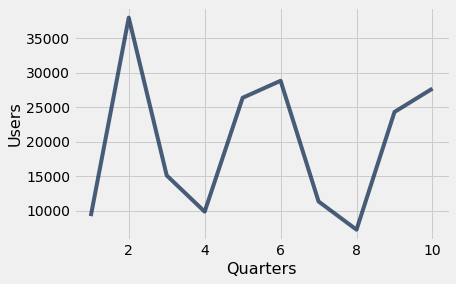

In [64]:
Table().with_column("Quarters", np.arange(1, 11)).with_column("Users", User_per_quarter).plot(0, 1)

From the line plot above, we can see that riders are more active in quarter numbers 2, 5, 6, 9, and 10 which, according to the table above, represents **Q3 in 2015, Q2 in 2016, Q3 in 2016, Q2 in 2017, and Q3 in 2017**. Riders are much less active in quarter numbers 1, 3, 4, 7, and 8 which correspond to **Q2 in 2015, Q4 in 2015, Q1 in 2016, Q4 in 2016, and Q1 in 2017**. To summarize, riders are more active in Q2 & Q3 versus Q1 & Q4. A compelling reason for this may be the weather. Q2 & Q3 align with the spring and summer seasons while Q1 & Q4 align with the autumn and winter seasons. 

**Next, let's see if trip duration also varies by time of year.** 

To do this, we will define another function called `trip_dur_quarter` that takes in the same argument x as above of the list of all the tables called `quarter_names` and will return a list of the average trip duration per quarter. We will use this output to create a line plot in order to better visualize the data. 

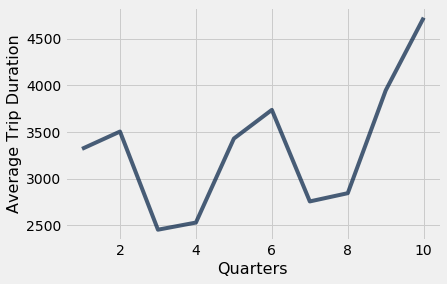

In [57]:
def trip_dur_quarter(x):
    durations=[]
    for i in x:
        length=np.mean(i.column("Tripduration"))
        durations.append(length)
    return durations

Table().with_column("Quarters", np.arange(1, 11)).with_column("Average Trip Duration", trip_dur_quarter(quarter_names)).plot(0, 1)

From the line plot above, we see that average trip durations correspond to quarters as well. Average trip durations seem to be higher in quarter numbers 2, 5, 6, 9, and 10 which correspond to **Q3 in 2015, Q2 in 2016, Q3 in 2016, Q2 in 2017, and Q3 in 2017**. Conversely, average trip durations are lower in quarter numbers 1, 3, 4, 7, and 8 which correspond to **Q4 in 2015, Q1 in 2016, Q4 in 2016, and Q1 in 2017**. To summarize, average trip duration is much longer in Q2 & Q3 versus Q1 & Q4. Again, the reason for this may be the weather/season. 

Notice that this activity matches that of the users per quarter line plot exactly in terms of trip duration longivity and user activity according to quarter. In both, Q2 & Q3 are much more active while Q1 & Q4 are not. The shapes of the two line plots are very similar in terms of peaks, lows, and fluctuations, though they are slightly different in terms of intensity of fluctuations. 

To summarize, we can see from these two line plots that types of trips in terms of user activity and trip duration do vary by time of year with users being much more active and average trip duration being much longer in Quarters 2 & 3 versus Quarters 1 & 4. 

**Now, we'll look at whether types of trips vary by time of day.** 

To start, we'll use pandas to convert the date for start and end times into day of week. We will add this new information to the main table we've been working with `Total_with_all_stuff_final` and call the new table we will be working with in this part of the project to `Total_with_days`. 

In [65]:
#used pandas to convert date into day of the week
start_date_convert = pd.DataFrame({'my_dates':Total_with_all_stuff_final.column(3)})
start_date_convert['date'] = pd.to_datetime(start_date_convert['my_dates'])
start_date_convert['day_of_week'] = start_date_convert['date'].dt.weekday_name

In [66]:
end_date_convert = pd.DataFrame({'my_dates':Total_with_all_stuff_final.column(4)})
end_date_convert['date'] = pd.to_datetime(end_date_convert['my_dates'])
end_date_convert['day_of_week'] = end_date_convert['date'].dt.weekday_name

In [67]:
Total_with_days=Total_with_all_stuff_final.with_column("Start Day", start_date_convert["day_of_week"], "End Day", end_date_convert["day_of_week"])
Total_with_days 

To station id,From station id,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station name,To station name,Usertype,# of Racks,Start Latitude,Start Longitude,End Latitude,End Longitude,Start Day,End Day
1000,1000,25767868,1/11/2017 14:01,1/11/2017 14:25,70013,1482,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Wednesday,Wednesday
1000,1000,25767880,1/11/2017 14:03,1/11/2017 14:26,70479,1384,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Wednesday,Wednesday
1000,1000,25779222,1/13/2017 12:11,1/13/2017 12:17,70155,355,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Friday,Friday
1000,1000,25812448,1/19/2017 15:13,1/19/2017 16:23,70446,4223,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Thursday,Thursday
1000,1000,25817308,1/20/2017 10:21,1/20/2017 10:22,70093,81,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Friday,Friday
1000,1000,25823113,1/21/2017 12:25,1/21/2017 13:41,70036,4548,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Saturday,Saturday
1000,1000,25823127,1/21/2017 12:27,1/21/2017 13:17,70195,3027,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Saturday,Saturday
1000,1000,25823856,1/21/2017 15:03,1/21/2017 15:49,70442,2800,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Saturday,Saturday
1000,1000,25823865,1/21/2017 15:05,1/21/2017 15:50,70414,2663,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Saturday,Saturday
1000,1000,25823907,1/21/2017 15:13,1/21/2017 15:48,70028,2106,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,Customer,16,40.4413,-80.0047,40.4413,-80.0047,Saturday,Saturday


Then, we will use the `group` method to count the number of rides that start and end at each hour over a regular 24-hour day in two separate tables called `start_hour_count` and `end_hour_count`.

In [68]:
start_date_convert["hour"] = start_date_convert["date"].dt.hour
start_hour_count=Total_with_days.with_column("Start Hour", start_date_convert["hour"]).group("Start Hour")
start_hour_count

Start Hour,count
0,1874
1,1247
2,917
3,336
4,282
5,1009
6,1882
7,5728
8,9206
9,8082


In [69]:
end_date_convert["hour"] = end_date_convert["date"].dt.hour
end_hour_count=Total_with_days.with_column("End Hour", end_date_convert["hour"]).group("End Hour")
end_hour_count

End Hour,count
0,2311
1,1419
2,1178
3,474
4,306
5,596
6,1648
7,4556
8,8463
9,7150


We'll combine these two tables into one table called `Start_and_end_count` which we will then use to create an overlaid line plot in order to visualize and compare the start and end counts as shown below. From this, we see that the the two plots are very similar and align almost perfectly meaning that the start counts and end counts at each hour are almost equal. A reason for this is because each trip averages about an hour in length so the user would be checking out and returning the bike within the same hour. In terms of the trips being taken throughout the day, we can see from the line plot that starting at Hour 5, the number of trips being taken and ending increases almost steadily (with some drops) until approximately Hour 17 when the number of trips begins declining greatly. This may be because users are much more active during the middle of the day rather than in the early morning or night. 

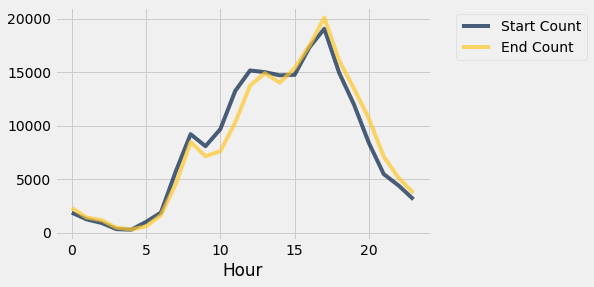

In [49]:
Start_and_end_count=start_hour_count.with_column("End Count", end_hour_count.column(1)).relabel("count", "Start Count").relabel("Start Hour", "Hour")
Start_and_end_count.plot(0)

Next, we'll create a new table called `Rides_per_day_of_week` that will count the number of rides that occur per day for each of the 7 days of the week. We'll also create a bar graph from this data in order to better compare the counts and see how they may vary by day of the week. 

In [50]:
Rides_per_day_of_week=Total_with_days.group("Start Day").with_column("Order", [6, 2, 7, 1, 5, 3, 4]).sort("Order").select(2, 0, 1)
Rides_per_day_of_week

Order,Start Day,count
1,Sunday,35097
2,Monday,24570
3,Tuesday,24697
4,Wednesday,26525
5,Thursday,23950
6,Friday,27265
7,Saturday,35655


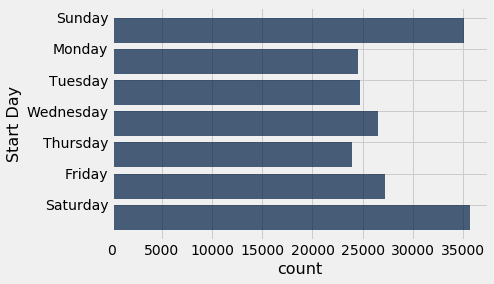

In [51]:
Rides_per_day_of_week.barh(1,2)

In [78]:
average_weekday = np.average(Rides_per_day_of_week.take(np.arange(1, 6)).column('count'))
average_weekday

25401.4

In [80]:
average_weekend = np.average(Rides_per_day_of_week.take([0, 6]).column('count'))
average_weekend

35376.0

In [83]:
difference_weekend_weekday = int(round(average_weekend - average_weekday))
difference_weekend_weekday

9975

From the bar graph above, we can see that Sunday and Saturday have more users than Monday through Friday and by the calculations above, the difference in users is on average about 9975 users which is a pretty considerable amount. We definitely can observe a difference trips based on day in terms of weekend versus weekday; however, if we are just comparing on a day by day basis, we can see that between the days of the week, the number of users only vary slightly; the same can be said when comparing the number of users between the two weekend days. The most significant difference would be between the weekend versus weekday users. 

**Next, we will continue looking at number of users per day, but in terms of user type.**

To do this, we will begin by creating a new table called `Ordered_Day_and_User` that will have the counts per day broken up by usertype. We will also create a bar graph to visualize this. 

In [52]:
Ordered_Day_and_User=Total_with_days.group(["Start Day", "Usertype"]).with_column("Order", [6, 6, 6, 2, 2, 2, 7, 7, 7, 1, 1, 1, 5, 5, 5, 3, 3, 3, 4, 4, 4]).sort("Order")
Ordered_Day_and_User

Start Day,Usertype,count,Order
Sunday,Customer,27879,1
Sunday,Daily,42,1
Sunday,Subscriber,7176,1
Monday,Customer,12936,2
Monday,Daily,15,2
Monday,Subscriber,11619,2
Tuesday,Customer,11989,3
Tuesday,Daily,19,3
Tuesday,Subscriber,12689,3
Wednesday,Customer,13120,4


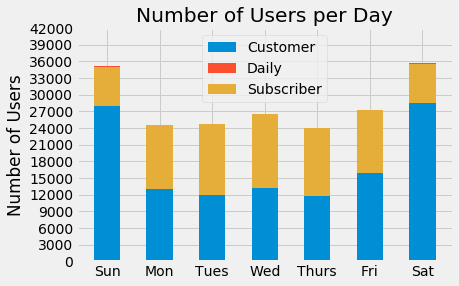

In [53]:
N = 7

cust_day  = Ordered_Day_and_User.take(np.arange(0, 21, 3)).column(2)
daily_day=Ordered_Day_and_User.take(np.arange(1, 21, 3)).column(2)
Sub_day=Ordered_Day_and_User.take(np.arange(2, 21, 3)).column(2)

ind = np.arange(N)    
width = 0.5       

p1 = plt.bar(ind, cust_day, width)
p2 = plt.bar(ind, daily_day, width, bottom=cust_day+Sub_day)
p3 = plt.bar(ind, Sub_day, width, bottom=cust_day )

plt.ylabel('Number of Users')
plt.title('Number of Users per Day')
plt.xticks(ind, (make_array("Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat")))
plt.yticks(np.arange(0, 45000, 3000))
plt.legend((p1[0], p2[0], p3[0]), ('Customer', 'Daily', "Subscriber"))

plt.show()

We already knew that the number of Daily user types is very low compared to the number of Customer and Subscriber users which is again reinforced by this bar graph. It is important to note that all three user types are active throughout the week, as seen on the table, though Daily users cannot be seen on the graph for the weekdays because their numbers are so low. Both Customer and Subscriber users are approximately equally active on the weekdays, but on the weekend, Customer users are much more active than Subscriber users. The reason for this can't be determined just from reading the table or the graphs, however. 

Again, from this information, we can see that user types do seem to vary based on day of the week, though the variation is not too great. 

**Next, we will look at trip duration per day.**

To start, we will create a table called `Avg_duration_per_day` which will contain the trip duration average for the 7 days of the week. We will also create a bar chart from this data.

In [54]:
Avg_duration_per_day=Total_with_days.select(6, "Start Day").group("Start Day", np.average).with_column("Order", [6, 2, 7, 1, 5, 3, 4]).sort("Order").select(2,0,1)
Avg_duration_per_day

Order,Start Day,Tripduration average
1,Sunday,4374.67
2,Monday,3172.11
3,Tuesday,2992.42
4,Wednesday,2966.41
5,Thursday,2986.45
6,Friday,3223.46
7,Saturday,4440


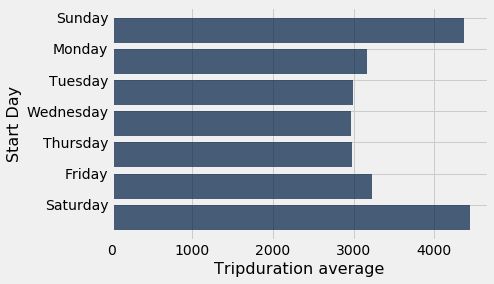

In [55]:
Avg_duration_per_day.barh(1, 2)

In [85]:
average_weekday_trip = np.average(Avg_duration_per_day.take(np.arange(1, 6)).column('Tripduration average'))
average_weekday_trip

3068.1712773530267

In [88]:
average_weekend_trip = np.average(Avg_duration_per_day.take([0, 6]).column('Tripduration average'))
average_weekend_trip

4407.333829498963

In [89]:
difference_avg_trip = int(round(average_weekend_trip - average_weekday_trip))
difference_avg_trip

1339

From the bar chart, we can see that trip duration average varies only slightly between the days of the week as well as between the two weekend days. However, it is greater on the weekend versus the weekdays; the difference in the average trip duration average on the weekend versus weekdays is 1339 seconds as calculated above. 

We can see that in terms of trip duration average, the day of the week does have an affect if comparing between weekdays and weekends, but varies only slightly if comparing between the days of the week or the days of the weekend. 

**SUMMARY**:
For question 3, we wanted to see if types of trips vary with time of day or time of year. To do so, we did the following:
    1. Looked at the number of users per quarter (time of year)
    2. Looked at the trip duration per quarter (time of year)
    3. Looked at start and end counts per hour (time of day)
    4. Looked at number of rides per day 
    5. Looked at number of rides per day based on user type
    6. Looked at average trip duration per day
    
**ANSWER**: 
For each of the following, we saw that the data did vary based on the time of day and time of year, though some more greatly than others. In terms of the number of users per quarter, we saw that certain quarters (Q2 & Q3) were much more popular than others (Q1 & Q4) in terms of activity. The same was seen for trip duration per quarter. In terms of start and end counts per hour, we saw that they aligned almost perfectly and that the morning/middle of the day is much more popular for riders than the early morning/night. For the number of rides per day as well as average trip duration per day, we saw that weekends are much more active than weekdays in terms of amount of rides as well as longivity of rides. When comparing just the weekdays or weekends, however, there wasn't much variation between the days. Lastly, looking at the number of rides per day based on user type, we also saw a similar pattern in that Subscriber and Customer user types are similar in activity during the days of the week but on the weekends, Customer users are much more active than Subscriber users. Again, we saw that Daily users are very small in numbers. Overall, from all of these comparisons, we can observe a difference in types of trips in terms of number of users/rides and average trip duration based on both the time of day for hour and day of week as well as time of year. 